### How to use **`raw_estimate()`**

In [1]:
import math
from numpy.testing import assert_allclose
from passive_extended_matchgate_simulator.raw_estimation import raw_estimate
from passive_extended_matchgate_simulator.exact import exact_calculation
from passive_extended_matchgate_simulator.utils import (ucj_to_compatible,  
                                                        get_bitstrings_and_probs, 
                                                        make_parameterized_controlled_phase_circuit)

#### We'll create a circuit that has 12 qubits and 16 controlled-phase gates. Our matchgates will be initialized randomly, but our controlled-phase gate angles will be sampled from  $\sim \mathcal{N}(0, .1)$.

In [2]:
mean, var = 0, .1
norb, nelec = 6, (3,3)
circuit = make_parameterized_controlled_phase_circuit(norb, nelec, mean, var)
compatible = ucj_to_compatible(circuit)

#### For clarity, we'll draw the decomposed circuit, but use the original circuit for simulation since this is faster.

Our circuit contains the following gates:
OrderedDict({'xx_plus_yy': 60, 'p': 24, 'cp': 16, 'x': 6})


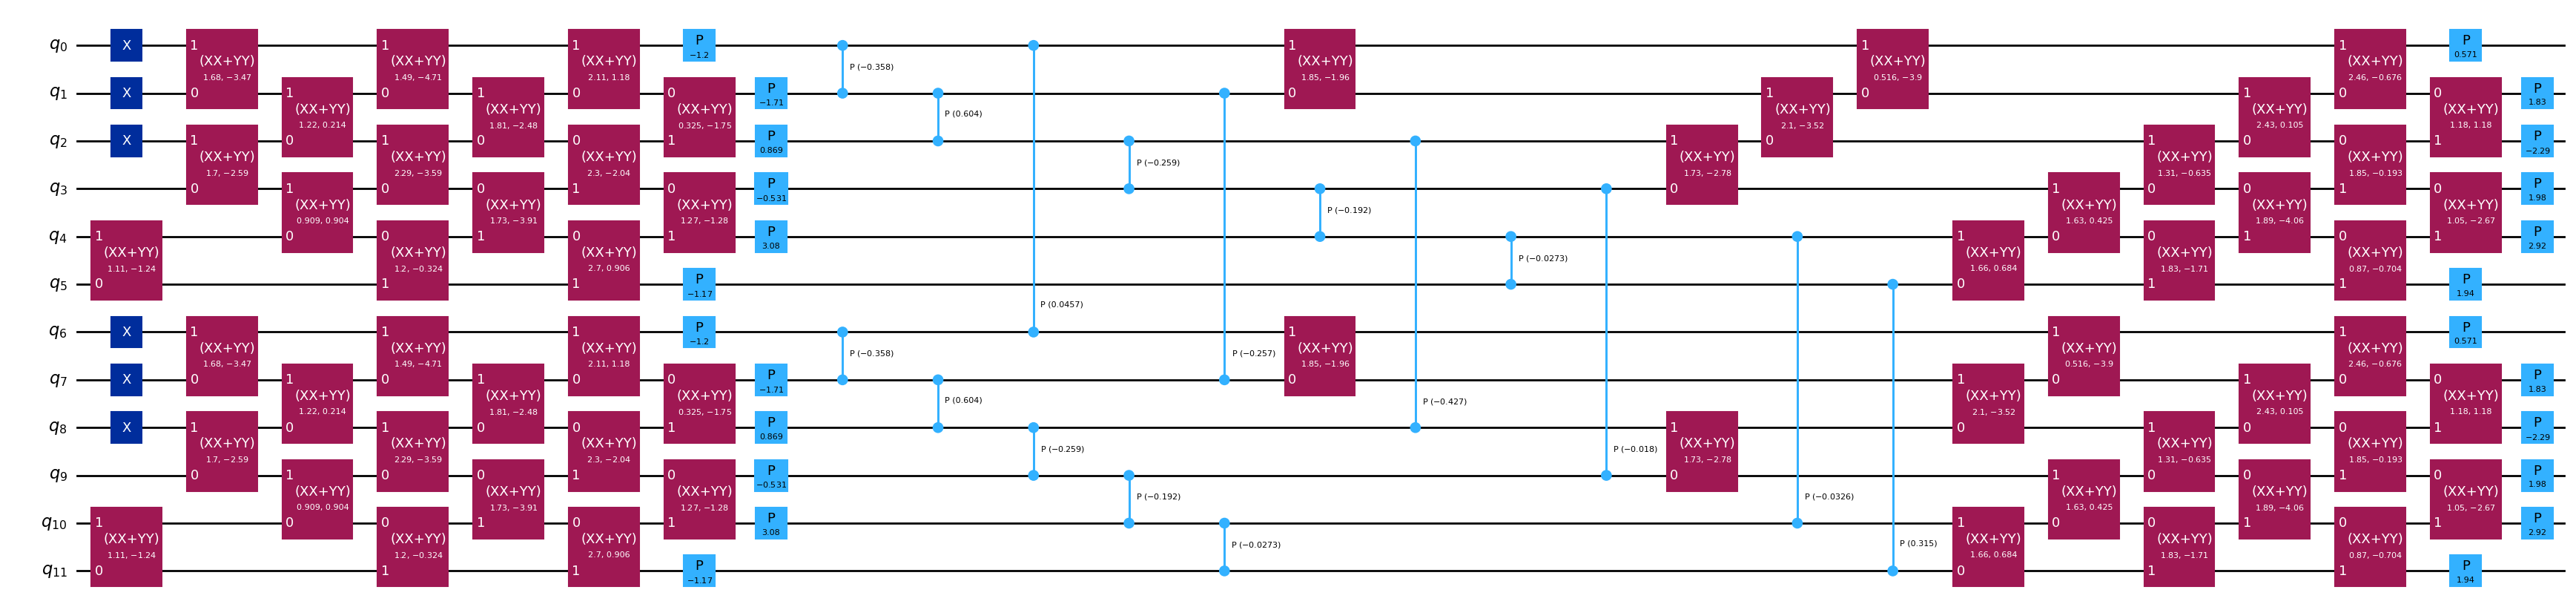

In [3]:
print("Our circuit contains the following gates:")
print(compatible.decompose(gates_to_decompose=['orb_rot_jw']).count_ops())
compatible.decompose(gates_to_decompose=['orb_rot_jw']).draw(fold=-1, output='mpl')

#### Let's estimate the probabilities of 5 arbitrary outcome measurements and compare our results to the exact calculation.

In [4]:
epsilon, delta, p = .1, .01, 1
bitstrings = [
    0b000111000111,
    0b010011000111,
    0b000111001011,
    0b000111100011,
    0b010101000111
]
exact_probs = exact_calculation(circuit=compatible,
                                outcome_states=bitstrings)

raw_estimates = raw_estimate(circuit=compatible, 
                             outcome_states=bitstrings, 
                             epsilon=epsilon, 
                             delta=delta, 
                             p=p)

print(max(abs(exact_probs - raw_estimates)))

0.0062180174181264425


#### Our estimates are well below the $\epsilon = .1$ error threshold.